# Generative Model

# References

In [1]:
#I acknowledge that this work is my own, and I have used ChatGPT 4 (OpenAI, https://chat.openai.com/) to
#rectify few of my errors in the code and also in some places where I had doubts in the code that I have explicitly mentioned in the codes below.

In [2]:
# Codes Adapted from:

# 1. Grid Representation - 
#    W3Schools is Powered by W3.CSS, Matplotlib Adding Grid Lines [computer program], 
#    Available from: https://www.w3schools.com/python/matplotlib_grid.asp

# 2. State Probabilties - projectrhea.org, Python Demonstration [computer program], 
#    Available from: https://www.projectrhea.org/rhea/index.php/Python_Demonstration

# OSM - https://towardsdatascience.com/find-and-plot-your-optimal-path-using-plotly-and-networkx-in-python-17e75387b873

# Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib.patches import FancyArrowPatch

# Grid Representation

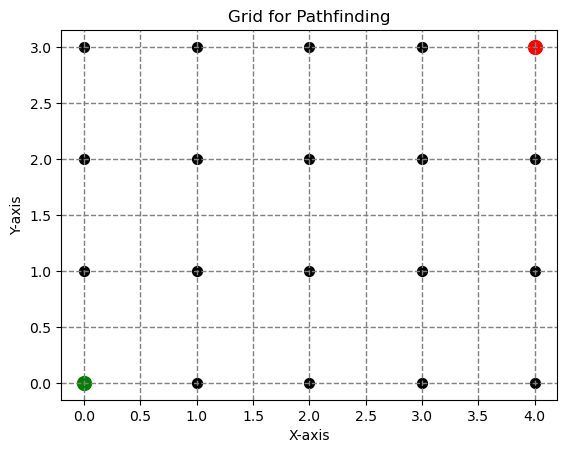

In [4]:
# Grid Representation [1]
plt.title("Grid for Pathfinding")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Define the start and end points for a 4x5 grid
start_point = (0, 0)
end_point = (3, 4) 

# Dimensions for the grid
rows = 4  # Number of rows
columns = 5  # Number of columns

# Generate each point on the grid - (x,y)
grid = list(itertools.product(range(rows), range(columns)))
plt.grid(True, color='grey', linestyle='--', linewidth=1)

# Plot the vertices
# matplotlib.axes.Axes.scatter, Available from : https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html
for vertex in grid:
    plt.scatter(vertex[1], vertex[0], color='black', s=50)  

# Plot the start and end points
plt.scatter(start_point[1], start_point[0], color='green', s=100, label='Start')  
plt.scatter(end_point[1], end_point[0], color='red', s=100, label='End')  


plt.show()

# Assigning transition probabilities for each points manually for a 3x3 grid

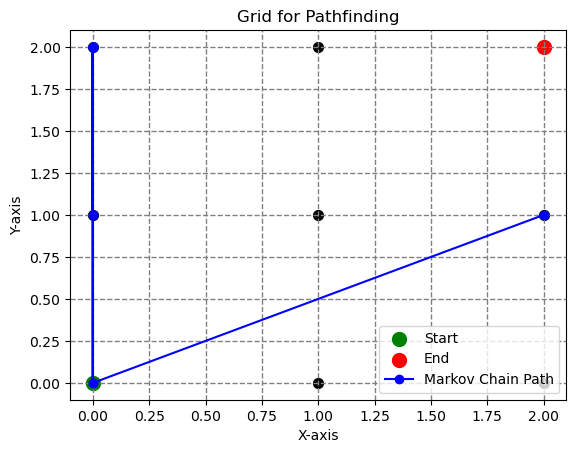

In [5]:
# Define the transition matrix A
A = np.array([
    [0.2, 0.3, 0.5],  # Transition probabilities from state 1
    [0.4, 0.1, 0.5],  # Transition probabilities from state 2
    [0.6, 0.2, 0.2],  # Transition probabilities from state 3
    [0.3, 0.2, 0.5],  # Transition probabilities from state 4
    [0.6, 0.2, 0.2],  # Transition probabilities from state 5
    [0.5, 0.4, 0.1],  # Transition probabilities from state 6
    [0.2, 0.6, 0.2],  # Transition probabilities from state 7
    [0.6, 0.2, 0.2],  # Transition probabilities from state 8
    [0.6, 0.2, 0.2]   # Transition probabilities from state 9
])

# Set the number of steps T
T = 10

# Choose a start state
current_state = np.random.choice(len(A))

# Simulate the Markov Chain 
path = [current_state]
for _ in range(T - 1):
    # Select the row corresponding to the current state as probabilities
    next_state = np.random.choice(len(A[0]), p=A[current_state])
    path.append(next_state)
    current_state = next_state
    
# Grid visualization
plt.title("Grid for Pathfinding")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Define the start and end points
start_point = (0, 0)
end_point = (2, 2)

grid_size = 3
grid = list(itertools.product(range(grid_size), repeat=2))

plt.grid(True, color='grey', linestyle='--', linewidth=1)

# Plot the vertices
for vertex in grid:
    plt.scatter(*vertex, color='black', s=50)

# Plot the start and end points
plt.scatter(*start_point, color='green', s=100, label='Start')
plt.scatter(*end_point, color='red', s=100, label='End')

# Plot the Markov Chain path on the grid
path_coordinates = [grid[state] for state in path]
x, y = zip(*path_coordinates)
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Markov Chain Path')

plt.legend()
plt.show()


# Random initialisation of transition matrix for 4x5 grid

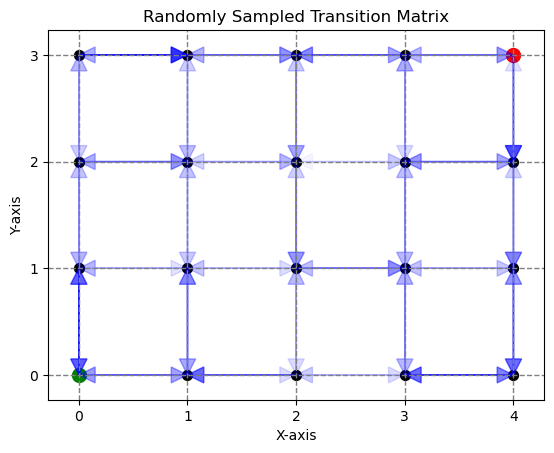

In [9]:
rows, columns = 4, 5  # Define grid dimensions
N = rows * columns  # Total number of states
A = np.zeros((N, N))  # Initialize transition matrix

# Helper function to convert grid coordinates to state index
def coord_to_state(coord, rows, columns):
    return coord[1] * columns + coord[0]

# Helper function to convert state index to grid coordinates
def state_to_coord(index, rows, columns):
    return (index % columns, index // columns)

# Iterate over each cell in the grid - asked GPT
for i in range(rows):
    for j in range(columns):
        current_index = coord_to_state((j, i), rows, columns)
        # Define potential moves (neighbors): up, down, left, right
        neighbors = [(j, i - 1), (j, i + 1), (j - 1, i), (j + 1, i)]
        # Filter out invalid neighbors (outside the grid)
        valid_neighbors = [neighbor for neighbor in neighbors if 0 <= neighbor[0] < columns and 0 <= neighbor[1] < rows]
        # Generate random transition probabilities for valid neighbors
        if valid_neighbors:
            for neighbor in valid_neighbors:
                neighbor_index = coord_to_state(neighbor, rows, columns)
                A[current_index, neighbor_index] = np.random.rand()
            
# Normalize each row so that probabilities sum to 1
# numpy.sum, Available from: https://numpy.org/doc/stable/reference/generated/numpy.sum.html          
A /= np.sum(A, axis=1, keepdims=True) 

# Plotting setup
plt.title("Grid for Pathfinding")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True, color='grey', linestyle='--', linewidth=1)
plt.xticks(range(columns))
plt.yticks(range(rows))

# Plot each point on the grid
for vertex in itertools.product(range(rows), range(columns)):
    plt.scatter(vertex[1], vertex[0], color='black', s=50)

# Plot the start and end points
start_point = (0, 0)  # Starting point
end_point = (3, 4)  # End point
plt.scatter(start_point[1], start_point[0], color='green', s=100, label='Start')
plt.scatter(end_point[1], end_point[0], color='red', s=100, label='End')

# Draw arrows for transitions
plt.title("Randomly Sampled Transition Matrix")
for i in range(N):
    # Convert state index back to grid coordinates for plotting
    x, y = state_to_coord(i, rows, columns)
    # Correct the coordinates for plotting to match matplotlib's grid
    y_plot = rows - 1 - y
    x_plot = x
    
    for j in range(N):
        if A[i, j] > 0:
            # Convert destination state index back to grid coordinates
            nx, ny = state_to_coord(j, rows, columns)
            # Correct the coordinates for plotting to match matplotlib's grid
            ny_plot = rows - 1 - ny
            nx_plot = nx
            
            # Draw the arrow from (x_plot, y_plot) to (nx_plot, ny_plot)
            plt.arrow(x_plot, y_plot, nx_plot - x_plot, ny_plot - y_plot, color='blue', alpha=A[i, j], 
                      length_includes_head=True, head_width=0.15, head_length=0.15)

plt.show()


# Generative Model 
 **The sequence of states as sampled based on the initialised transition matrix 𝐀**

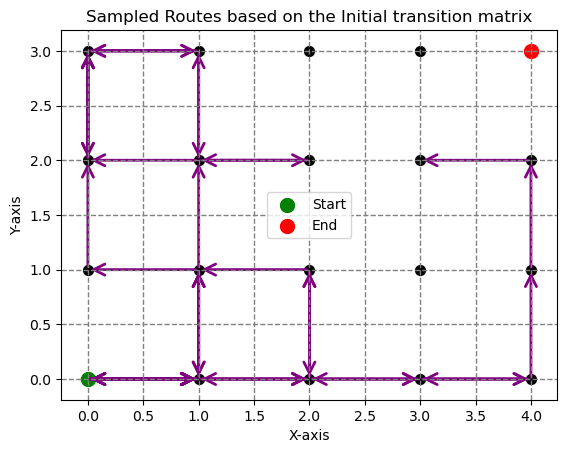

In [16]:
# Define the grid dimensions for a 4x5 grid
rows, columns = 4, 5

# Generate each point on the grid - (x,y)
grid = list(itertools.product(range(rows), range(columns)))

# Define the start and end points as grid coordinates
start_point = (0, 0)  
end_point = (3, 4)  

# Plot the vertices
for vertex in grid:
    plt.scatter(vertex[1], vertex[0], color='black', s=50)  

# Plot the start and end points
plt.scatter(start_point[1], start_point[0], color='green', s=100, label='Start')  
plt.scatter(end_point[1], end_point[0], color='red', s=100, label='End') 

# Convert state index to grid coordinates for a 4x5 grid
def state_to_coord(state, rows, columns):
    return (state % columns, state // columns)

# Convert grid coordinates to state index for a 4x5 grid
def coord_to_state(coord, rows, columns):
    return coord[1] * columns + coord[0]


# Convert the start and end points to state indices
start_state = coord_to_state(start_point, rows, columns)
end_state = coord_to_state(end_point, rows, columns)


# Function to simulate paths on the grid using the optimized transition matrix
def simulate_path(A, start_state, end_state, rows, columns):
    current_state = start_state
    path = [current_state]
    
    T = 12  # Maximum number of steps in a path
    for _ in range(T - 1):
        next_state = np.random.choice(len(A), p=A[current_state])
        path.append(next_state)
        current_state = next_state
        if current_state == end_state:
            break
    return path

# Simulate multiple paths
num_paths = 5
paths = [simulate_path(A, start_state, end_state, rows, columns) for _ in range(num_paths)]

# Plot the grid
plt.grid(True, color='grey', linestyle='--', linewidth=1)
plt.title("Sampled Routes based on the Initial transition matrix".format(num_paths))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")


# Plot the paths with arrows - asked GPT

for path in paths:
    coords = np.array([state_to_coord(state, rows, columns) for state in path])
    for i in range(len(coords)-1):
        start_coord = coords[i]  
        end_coord = coords[i+1]
        arrow = FancyArrowPatch(start_coord, end_coord, arrowstyle='->', mutation_scale=20, color='purple', linewidth=2)
        plt.gca().add_patch(arrow)


plt.legend()
plt.show()


# State Probabilities

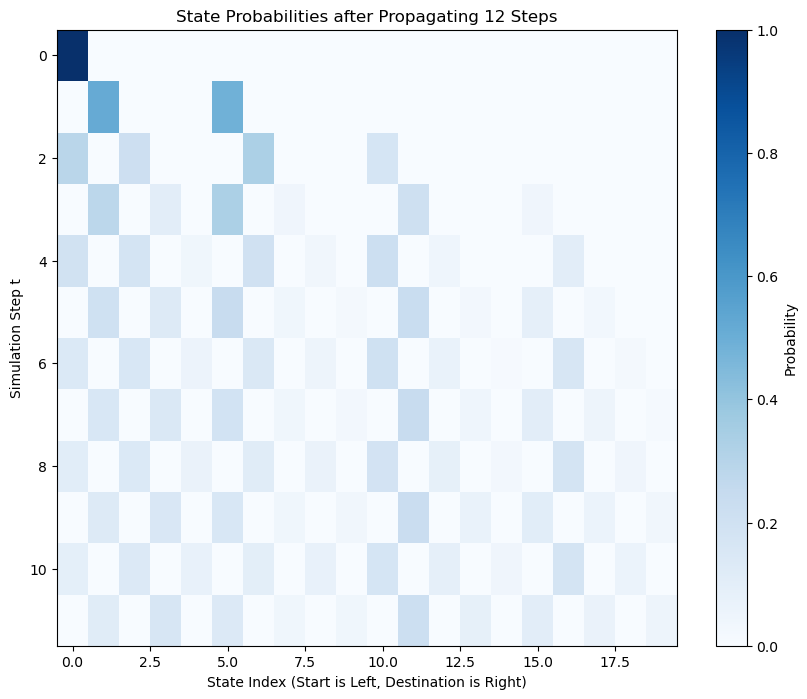

In [8]:
# Set the number of steps
n_steps = 12
n_states = rows * columns

# Initialize the state probabilities for each step
state_probabilities = np.zeros((n_steps, n_states))

# Set the initial state probabilities (assuming we start from state 0)
state_probabilities[0, 0] = 1

# Propagate the state probabilities through the Markov chain -
for step in range(1, n_steps):
    # Update the state probabilities for the current step
    state_probabilities[step] = np.dot(state_probabilities[step - 1], A)

# Create a heat map for the state probabilities after n_steps - asked ChatGPT for the plotting - State Transitions [2]
plt.figure(figsize=(10, 8))
plt.imshow(state_probabilities, cmap='Blues', aspect='auto')

plt.colorbar(label='Probability')
plt.title('State Probabilities after Propagating {} Steps'.format(n_steps))
plt.xlabel('State Index (Start is Left, Destination is Right)')
plt.ylabel('Simulation Step t')
plt.show()


In [ ]:
#https://towardsdatascience.com/find-and-plot-your-optimal-path-using-plotly-and-networkx-in-python-17e75387b873

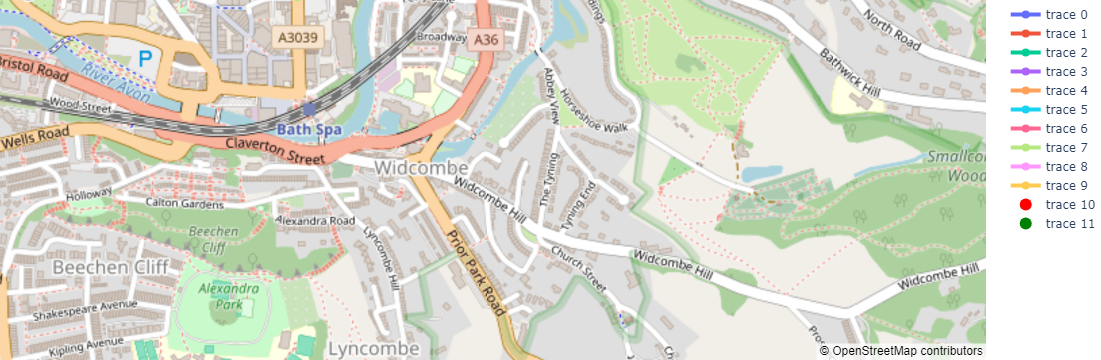

In [1]:
import osmnx as ox
import numpy as np
import plotly.graph_objects as go
import random

def download_and_create_graph():
    # Adjust to cover the area of interest
     north, south, east, west = 51.3815, 51.37667, -2.3587, -2.32583

     # Use the bbox parameter with a tuple containing (north, south, east, west)
     G = ox.graph_from_bbox(bbox=(north, south, east, west), network_type='drive')

     return G

def simulate_hmm_path(G, start_node, end_node, path_length=10):
    """Simulates path generation, mimicking an HMM-like process."""
    path = [start_node]
    for _ in range(path_length - 1):
        current_node = path[-1]
        neighbors = list(G.neighbors(current_node))
        if end_node in neighbors:
            path.append(end_node)  # Directly append end_node if it's a neighbor
            break
        next_node = random.choice(neighbors) if neighbors else current_node
        path.append(next_node)
    return path
    
def plot_paths(G, paths, origin_point, destination_point):
    fig = go.Figure()
    for path in paths:
        long, lat = zip(*[(G.nodes[node]['x'], G.nodes[node]['y']) for node in path])
        # Increase line width here
        fig.add_trace(go.Scattermapbox(mode="lines+markers", lon=long, lat=lat, marker={'size': 8}, line={'width': 4}))
    # Adding markers for the origin and destination points
    fig.add_trace(go.Scattermapbox(mode="markers", lon=[origin_point[1]], lat=[origin_point[0]], marker={'size': 12, 'color': "red"}))
    fig.add_trace(go.Scattermapbox(mode="markers", lon=[destination_point[1]], lat=[destination_point[0]], marker={'size': 12, 'color': 'green'}))
    
    # Set map center and zoom level
    fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=13, mapbox_center={"lat": np.mean([origin_point[0], destination_point[0]]), "lon": np.mean([origin_point[1], destination_point[1]])})
    
    # Remove margin around the plot
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

def main():

    origin_point = (51.3815, -2.3587)  # Southwest corner (latitude, longitude)
    destination_point = (51.37667, -2.32583)  # Northeast corner
    G = download_and_create_graph()
    start_node = ox.distance.nearest_nodes(G, origin_point[1], origin_point[0])
    end_node = ox.distance.nearest_nodes(G, destination_point[1], destination_point[0])
    paths = [simulate_hmm_path(G, start_node, end_node, path_length=10) for _ in range(10)]  # Generate 5 simulated paths

    
    plot_paths(G, paths, origin_point, destination_point)

main()
